## Prose
#### The notebook contains data cleaning, unguided data visualization and guided data visualization. The unguided data visualization includes histograms and KS plots that helped discover relations between variables. In the guided visualization part, a dashboard is created to dig further in correlations of multiple factors. To use the dashboard, simply click any square on the left map, then the corresponding plot should be displayed on the right side. They showed that dates, districts are linked to crime categories and their number. In the last part, I tried to visualized the crime locations on a real map. Locations that have most crimes are marked. 
#### The contextual dataset is BOSTON NEIGHBORHOODS. Link: https://data.boston.gov/dataset/boston-neighborhoods. It is useful for colorscaling of different parts in Boston on the map.

## Code
## Clean data delete NA values

In [259]:
# usual things
import pandas as pd
import matplotlib.pyplot as plt
import bqplot
import numpy as np
import ipywidgets
import time as systime
import datetime as dt
import string
import seaborn as sns
import bqplot.pyplot as pt
%matplotlib inline

In [18]:
data = pd.read_csv('bostoncrime.csv')
data.columns.values

array(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR',
       'UCR_PART', 'STREET', 'Lat', 'Long', 'Location'], dtype=object)

In [19]:
data.shape

(273130, 17)

In [20]:
data = data.dropna()

In [21]:
data.shape

(1084, 17)

In [22]:
data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
894,I192077645,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,295,Y,2019-09-26 02:38:00,2019,9,Thursday,2.0,Part One,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)"
895,I192077645,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,295,Y,2019-09-26 02:38:00,2019,9,Thursday,2.0,Part Two,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)"
907,I192077627,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,344,Y,2019-09-25 23:42:00,2019,9,Wednesday,23.0,Part One,WESTVILLE TER,42.300980,-71.068699,"(42.30098009, -71.06869928)"
2798,I192075578,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,457,Y,2019-09-19 17:16:00,2019,9,Thursday,17.0,Part One,FOWLER ST,42.300068,-71.083369,"(42.30006755, -71.08336910)"
3421,I192074923,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,326,Y,2019-09-17 22:35:00,2019,9,Tuesday,22.0,Part One,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"
3422,I192074923,1402,Vandalism,VANDALISM,B2,326,Y,2019-09-17 22:35:00,2019,9,Tuesday,22.0,Part Two,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"
3702,I192074613,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",C11,370,Y,2019-09-16 23:46:00,2019,9,Monday,23.0,Part One,WILLIAM T MORRISSEY BLVD,42.295072,-71.047497,"(42.29507166, -71.04749709)"
3703,I192074613,3125,Warrant Arrests,WARRANT ARREST,C11,370,Y,2019-09-16 23:46:00,2019,9,Monday,23.0,Part Three,WILLIAM T MORRISSEY BLVD,42.295072,-71.047497,"(42.29507166, -71.04749709)"
4195,I192074077,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,240,Y,2019-09-15 02:19:00,2019,9,Sunday,2.0,Part One,COLUMBIA RD,42.319593,-71.062607,"(42.31959298, -71.06260700)"
5190,I192072998,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E5,721,Y,2019-09-11 20:33:00,2019,9,Wednesday,20.0,Part One,CONSTANCE RD,42.276311,-71.165579,"(42.27631087, -71.16557934)"


In [23]:
cate_group = data.groupby(by='OFFENSE_CODE_GROUP').size()
cate_group

OFFENSE_CODE_GROUP
Aggravated Assault                 493
Auto Theft                           1
Ballistics                          59
Disorderly Conduct                   1
Drug Violation                      27
Firearm Discovery                    3
Firearm Violations                  95
Homicide                           137
Investigate Person                  11
Investigate Property                17
Manslaughter                         1
Medical Assistance                  23
Motor Vehicle Accident Response      9
Other                               20
Police Service Incidents             2
Property Found                       2
Property Lost                        1
Property Related Damage              1
Recovered Stolen Property            2
Robbery                             18
Search Warrants                     37
Simple Assault                       2
Towed                               11
Vandalism                           19
Violations                           1
Warran

## Unguided data visualization

12


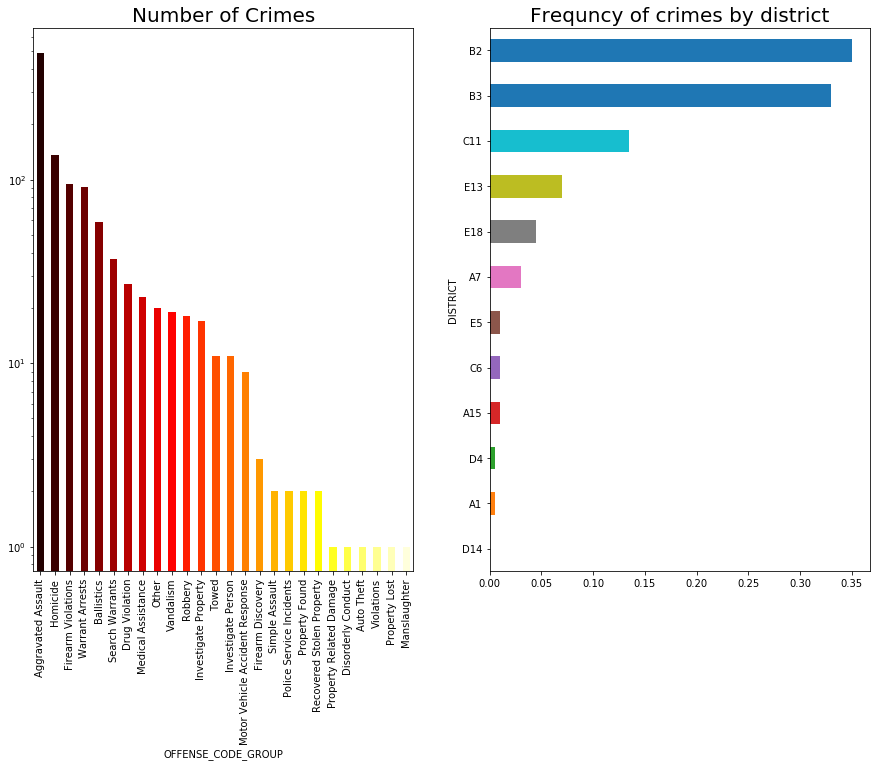

In [437]:
plt.figure(figsize=(6,8))
# Number of crimes in different types
cat_num = len(cate_group.index)
cate_group.index = cate_group.index.map(string.capwords)
cate_group.sort_values(ascending=False,inplace=True)
plt.subplot(121)
cate_group.plot(kind='bar',logy=True,figsize=(15,10),color=sns.color_palette('hot',cat_num))
plt.title('Number of Crimes',fontsize=20)

dis_group = data.groupby(by='DISTRICT').size()
print(len(dis_group))
dis_group

# Frequency of crimes in different distrcts
dis_group = dis_group/sum(dis_group)
dis_group.index = dis_group.index.map(string.capwords)
dis_group.sort_values(ascending=True,inplace=True)
plt.subplot(122)
dis_group.plot(kind='barh',figsize=(15,10),fontsize=10)
plt.title('Frequncy of crimes by district',fontsize=20)
plt.show()

#### Apparently, number of crimes vary hugely between districts, A15 is the safest place and B2 is the most dangerous place though.

In [35]:
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])

In [37]:
data['year'] = data.OCCURRED_ON_DATE.dt.year
data['month'] = data.OCCURRED_ON_DATE.dt.month
data['day'] = data.OCCURRED_ON_DATE.dt.day
data['hour'] = data.OCCURRED_ON_DATE.dt.hour

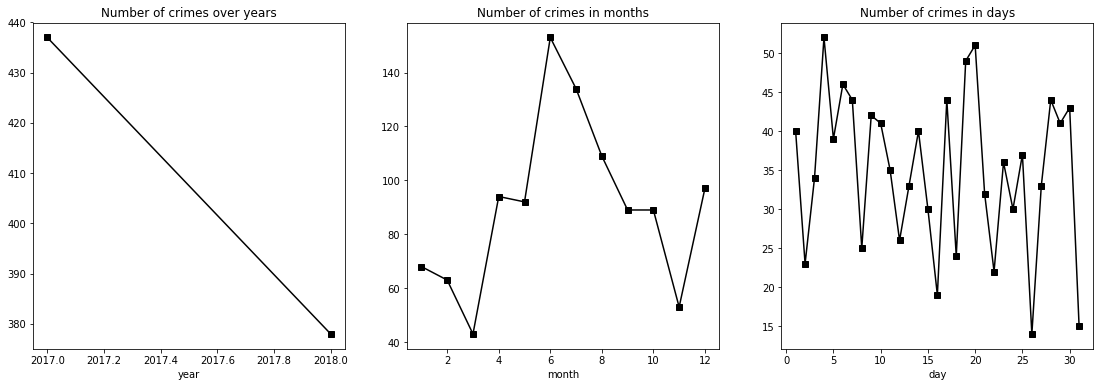

In [54]:
# Find relations in number of crimes and dates
plt.figure(figsize=(19,6))

year_group = data.groupby('year').size()
plt.subplot(131)
plt.plot(year_group.index[:-1],year_group[:-1],'ks-')
plt.xlabel('year')
plt.title('Number of crimes over years')

month_group = data.groupby('month').size()
plt.subplot(132)
plt.plot(month_group,'ks-')
plt.xlabel('month')
plt.title('Number of crimes in months')

day_group = data.groupby('day').size()
plt.subplot(133)
plt.plot(day_group,'ks-')
plt.xlabel('day')
plt.title('Number of crimes in days')

plt.show()

In [416]:
# from ipywidgets import interactive
# hour_group = data.groupby('HOUR').size()
# def f(x):
#     plt.figure(2)
#     x = data['HOUR']
#     plt.plot(x,'ks-')
# #     plt.ylim(-5, 5)
#     plt.show()

# interactive_plot = interactive(f,x=hour_group)
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
# interactive_plot

interactive(children=(Dropdown(description='x', options=(106, 47, 71, 31, 10, 14, 13, 7, 21, 13, 13, 21, 44, 2…

In [438]:
# from IPython.display import display
# xs = bq.LinearScale()
# ys = bq.LinearScale()
# x = np.arange(100)
# y = np.cumsum(np.random.randn(2, 100), axis=1) #two random walks

# line = bq.Lines(x=x, y=y, scales={'x': xs, 'y': ys}, colors=['red', 'green'])
# xax = bq.Axis(scale=xs, label='x', grid_lines='solid')
# yax = bq.Axis(scale=ys, orientation='vertical', tick_format='0.2f', label='y', grid_lines='solid')

# fig = bq.Figure(marks=[line], axes=[xax, yax], animation_duration=1000)
# display(fig)

Figure(animation_duration=1000, axes=[Axis(label='x', scale=LinearScale()), Axis(label='y', orientation='verti…

In [69]:
# from matplotlib import pyplot as plt
# import ipywidgets as w
# from IPython.display import display, clear_output

# sliders = [w.IntSlider(), w.IntSlider(), w.IntSlider()]
# o = w.Output()

# def update_chart(change):
#     with o:
#         clear_output()
#         plt.plot([s.value for s in sliders])
#         plt.show()
# for s in sliders:
#     s.observe(update_chart, 'value')
# update_chart(None)
# w.HBox([w.VBox(sliders), o])

## Guided data visualization

In [71]:
data["DISTRICT"] = data["DISTRICT"].astype('category')
data.dtypes

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                     category
REPORTING_AREA                 object
SHOOTING                       object
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                          float64
UCR_PART                       object
STREET                         object
Lat                           float64
Long                          float64
Location                       object
year                            int64
month                           int64
day                             int64
hour                            int64
dtype: object

In [72]:
data["dis"] = data["DISTRICT"].cat.codes
data.head(100)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,...,UCR_PART,STREET,Lat,Long,Location,year,month,day,hour,dis
894,I192077645,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,295,Y,2019-09-26 02:38:00,2019,9,...,Part One,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)",2019,9,26,2,3
895,I192077645,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,295,Y,2019-09-26 02:38:00,2019,9,...,Part Two,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)",2019,9,26,2,3
907,I192077627,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,344,Y,2019-09-25 23:42:00,2019,9,...,Part One,WESTVILLE TER,42.300980,-71.068699,"(42.30098009, -71.06869928)",2019,9,25,23,5
2798,I192075578,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,457,Y,2019-09-19 17:16:00,2019,9,...,Part One,FOWLER ST,42.300068,-71.083369,"(42.30006755, -71.08336910)",2019,9,19,17,4
3421,I192074923,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,326,Y,2019-09-17 22:35:00,2019,9,...,Part One,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)",2019,9,17,22,3
3422,I192074923,1402,Vandalism,VANDALISM,B2,326,Y,2019-09-17 22:35:00,2019,9,...,Part Two,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)",2019,9,17,22,3
3702,I192074613,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",C11,370,Y,2019-09-16 23:46:00,2019,9,...,Part One,WILLIAM T MORRISSEY BLVD,42.295072,-71.047497,"(42.29507166, -71.04749709)",2019,9,16,23,5
3703,I192074613,3125,Warrant Arrests,WARRANT ARREST,C11,370,Y,2019-09-16 23:46:00,2019,9,...,Part Three,WILLIAM T MORRISSEY BLVD,42.295072,-71.047497,"(42.29507166, -71.04749709)",2019,9,16,23,5
4195,I192074077,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,240,Y,2019-09-15 02:19:00,2019,9,...,Part One,COLUMBIA RD,42.319593,-71.062607,"(42.31959298, -71.06260700)",2019,9,15,2,5
5190,I192072998,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E5,721,Y,2019-09-11 20:33:00,2019,9,...,Part One,CONSTANCE RD,42.276311,-71.165579,"(42.27631087, -71.16557934)",2019,9,11,20,11


In [73]:
data.dtypes

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                     category
REPORTING_AREA                 object
SHOOTING                       object
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                          float64
UCR_PART                       object
STREET                         object
Lat                           float64
Long                          float64
Location                       object
year                            int64
month                           int64
day                             int64
hour                            int64
dis                              int8
dtype: object

In [300]:
total_crm = data.groupby([data['day'],data['DISTRICT']])['INCIDENT_NUMBER'].count().reset_index()
total_crm["DISTRICT"] = total_crm["DISTRICT"].astype('category')
total_crm["dis"] = total_crm["DISTRICT"].cat.codes
total_crm["inci"] = total_crm["INCIDENT_NUMBER"]
total_crm.head(10)

,day,DISTRICT,INCIDENT_NUMBER,dis,inci
0,1,A7,5,2,5
1,1,B2,7,3,7
2,1,B3,6,4,6
3,1,C11,16,5,16
4,1,C6,4,6,4
5,1,E13,2,9,2
6,2,A1,1,0,1
7,2,B2,5,3,5
8,2,B3,13,4,13
9,2,C11,2,5,2


In [338]:
# confirm the correctness of the last execution
a = data[(data.day==1)&(data.dis==2)].index.tolist()
print(a)

[132995, 132996, 132997, 132998, 132999]


In [339]:
hist2d, ag_edges, dist_edges = np.histogram2d(total_crm['day'], 
                                              total_crm['dis'], 
                                              weights = total_crm['inci'], 
                                              bins=[31,9])

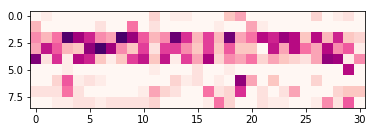

In [340]:
import matplotlib.colors as mpl_colors
plt.imshow(hist2d.T, cmap='RdPu', norm=mpl_colors.SymLogNorm(10))

In [341]:
np.nanmin(hist2d)

0.0

In [342]:
np.nanmax(hist2d)

29.0

In [343]:
ag_centers = (ag_edges[:-1] + ag_edges[1:])/2
ag_centers

array([ 1.48387097,  2.4516129 ,  3.41935484,  4.38709677,  5.35483871,
        6.32258065,  7.29032258,  8.25806452,  9.22580645, 10.19354839,
       11.16129032, 12.12903226, 13.09677419, 14.06451613, 15.03225806,
       16.        , 16.96774194, 17.93548387, 18.90322581, 19.87096774,
       20.83870968, 21.80645161, 22.77419355, 23.74193548, 24.70967742,
       25.67741935, 26.64516129, 27.61290323, 28.58064516, 29.5483871 ,
       30.51612903])

In [344]:
dist_centers = (dist_edges[:-1] + dist_edges[1:])/2
dist_centers

array([ 0.61111111,  1.83333333,  3.05555556,  4.27777778,  5.5       ,
        6.72222222,  7.94444444,  9.16666667, 10.38888889])

In [345]:
hist2d = hist2d.T
np.log10(hist2d).min()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


-inf

In [346]:
hist2d[hist2d<= 0] = np.nan

hist2d = np.log10(hist2d)

In [395]:
# scales
x_sc = bqplot.LinearScale() 
y_sc = bqplot.LinearScale() 
col_sc = bqplot.ColorScale(scheme='BuPu', min=np.nanmin(hist2d), max=np.nanmax(hist2d))

# axis
x_ax = bqplot.Axis(scale=x_sc, label='Day in a month')
y_ax = bqplot.Axis(scale=y_sc, label='District', orientation='vertical')
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')

# marks
heat_map = bqplot.GridHeatMap(color=hist2d, 
                             row=dist_edges, 
                             column=ag_edges, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'blue'})

# interactivity - do this!
mySelectedLabel = ipywidgets.Label() # print out info about our selection
def get_data_value(change):
    # to make sure we only support single selections
    if len(change['owner'].selected) == 1: # *only* 1 selection
        #print(change['owner'].selected)
        i,j = change['owner'].selected[0]
        v = hist2d[i,j]
        mySelectedLabel.value = 'Total crime number in log = ' + str(v)
    
# # make sure we "observe" for a change in our heatmap (traitlets)
heat_map.observe(get_data_value, 'selected')

# put all together
fig = bqplot.Figure(marks=[heat_map], axes=[c_ax, y_ax, x_ax])
# fig
# layout our dashboard
myDashboard = ipywidgets.VBox([mySelectedLabel, fig])
myDashboard

In [396]:
cn = data.groupby([data['day'],data['DISTRICT'],data['OFFENSE_CODE_GROUP']])['INCIDENT_NUMBER'].count().reset_index()
cn["DISTRICT"] = cn["DISTRICT"].astype('category')
cn["dis"] = cn["DISTRICT"].cat.codes
cn["inci"] = cn["INCIDENT_NUMBER"]
cn

,day,DISTRICT,OFFENSE_CODE_GROUP,INCIDENT_NUMBER,dis,inci
0,1,A7,Drug Violation,1,2,1
1,1,A7,Homicide,1,2,1
2,1,A7,Investigate Person,1,2,1
3,1,A7,Other,1,2,1
4,1,A7,Warrant Arrests,1,2,1
5,1,B2,Aggravated Assault,3,3,3
6,1,B2,Drug Violation,1,3,1
7,1,B2,Firearm Violations,1,3,1
8,1,B2,Recovered Stolen Property,1,3,1
9,1,B2,Warrant Arrests,1,3,1


In [397]:
cn["OFFENSE_CODE_GROUP"].value_counts()

Aggravated Assault                 167
Homicide                            77
Warrant Arrests                     61
Firearm Violations                  45
Ballistics                          42
Search Warrants                     29
Medical Assistance                  19
Drug Violation                      17
Robbery                             16
Vandalism                           15
Other                               14
Investigate Property                12
Motor Vehicle Accident Response      7
Investigate Person                   7
Towed                                7
Firearm Discovery                    3
Recovered Stolen Property            2
Simple Assault                       2
Manslaughter                         1
Property Found                       1
Violations                           1
Police Service Incidents             1
Disorderly Conduct                   1
Auto Theft                           1
Property Lost                        1
Property Related Damage  

In [398]:
max(cn['inci'])

15

In [399]:
# CREATE LABEL - #1
mySelectedLabel = ipywidgets.Label() # print out info about our selection

In [400]:
# CREATE HEATMAP ELEMENTS - #2
# scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale() 
col_sc = bqplot.ColorScale(scheme='BuPu', min=np.nanmin(hist2d), max=np.nanmax(hist2d))

# axis
x_ax = bqplot.Axis(scale=x_sc, label='day')
y_ax = bqplot.Axis(scale=y_sc, label='District', orientation='vertical')
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')

# marks
heat_map = bqplot.GridHeatMap(color=hist2d, 
                             row=dist_centers, 
                             column=ag_centers, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'blue'})

In [409]:
x_ord = bqplot.OrdinalScale()
y_sc = bqplot.LinearScale()

ax_x = bqplot.Axis(label='Crime Category', scale=x_ord, orientation='vertical', fontsize=10)
ax_y = bqplot.Axis(label='Crime Number',scale=y_sc, tick_format='0.2f')

bar = bqplot.Bars(x=cn['OFFENSE_CODE_GROUP'], y=cn['inci'], scales={'x': x_ord, 'y': y_sc}, orientation='horizontal', color_mode='group')
# bqplot.Figure(marks=[bar], axes=[ax_x, ax_y])

In [410]:
# LINKING BAR PLOT WITH HEATMAP
def get_data_value(change):
    # to make sure we only support single selections
    if len(change['owner'].selected) == 1: # *only* 1 selection
        i,j = change['owner'].selected[0]
        v = hist2d[i,j]
        mySelectedLabel.value = 'Crime Number' + str(v)
        # UPDATE SCATTER PLOT TOO
        ags = [ag_edges[j], ag_edges[j+1]]
        dists = [dist_edges[i], dist_edges[i+1]]
        region_mask = ( (cn['day'] >= ags[0]) & (cn['day'] <= ags[1]) &\
                       (cn['dis'] >= dists[0]) & (cn['dis']<= dists[1]) )
        bar.x = cn['OFFENSE_CODE_GROUP'][region_mask]
        bar.y = cn['inci'][region_mask]
          
# make sure we "observe" for a change in our heatmap (traitlets)
heat_map.observe(get_data_value, 'selected')

In [411]:
# CREATE FIGURE OBJECTS - #5
fig_heatmap = bqplot.Figure(marks=[heat_map], axes=[c_ax, y_ax, x_ax], title = 'Numbers of Crime in districts vs day')
fig_num = bqplot.Figure(marks=[bar], axes=[ax_x, ax_y], title = 'Number of Crimes in categories')

# Put it all together finally!  As a dashboard

In [440]:
fig_heatmap.layout.min_width='400px'
fig_num.layout.min_width = '400px'

plots = ipywidgets.HBox([fig_heatmap, fig_num])
myDashboard = ipywidgets.VBox([mySelectedLabel, plots])
myDashboard
# plots

## CREATE MAP WITH CRIME LOCATIONS

In [420]:
!pip install folium

     |████████████████████████████████| 92kB 2.7MB/s eta 0:00:01


In [418]:
data[['Lat','Long']].describe()

,Lat,Long
count,1084.000000,1084.000000
mean,42.310372,-71.082234
std,0.024002,0.019643
min,42.236311,-71.165579
25%,42.292442,-71.091878
50%,42.312243,-71.081384
75%,42.324938,-71.071036
max,42.391933,-70.995362


In [417]:
data.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,...,UCR_PART,STREET,Lat,Long,Location,year,month,day,hour,dis
894,I192077645,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,295,Y,2019-09-26 02:38:00,2019,9,...,Part One,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)",2019,9,26,2,3
895,I192077645,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,295,Y,2019-09-26 02:38:00,2019,9,...,Part Two,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)",2019,9,26,2,3
907,I192077627,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,344,Y,2019-09-25 23:42:00,2019,9,...,Part One,WESTVILLE TER,42.300980,-71.068699,"(42.30098009, -71.06869928)",2019,9,25,23,5
2798,I192075578,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,457,Y,2019-09-19 17:16:00,2019,9,...,Part One,FOWLER ST,42.300068,-71.083369,"(42.30006755, -71.08336910)",2019,9,19,17,4
3421,I192074923,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,326,Y,2019-09-17 22:35:00,2019,9,...,Part One,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)",2019,9,17,22,3
3422,I192074923,1402,Vandalism,VANDALISM,B2,326,Y,2019-09-17 22:35:00,2019,9,...,Part Two,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)",2019,9,17,22,3
3702,I192074613,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",C11,370,Y,2019-09-16 23:46:00,2019,9,...,Part One,WILLIAM T MORRISSEY BLVD,42.295072,-71.047497,"(42.29507166, -71.04749709)",2019,9,16,23,5
3703,I192074613,3125,Warrant Arrests,WARRANT ARREST,C11,370,Y,2019-09-16 23:46:00,2019,9,...,Part Three,WILLIAM T MORRISSEY BLVD,42.295072,-71.047497,"(42.29507166, -71.04749709)",2019,9,16,23,5
4195,I192074077,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,240,Y,2019-09-15 02:19:00,2019,9,...,Part One,COLUMBIA RD,42.319593,-71.062607,"(42.31959298, -71.06260700)",2019,9,15,2,5
5190,I192072998,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E5,721,Y,2019-09-11 20:33:00,2019,9,...,Part One,CONSTANCE RD,42.276311,-71.165579,"(42.27631087, -71.16557934)",2019,9,11,20,11


In [421]:
import folium
folium.__version__
# Create world map
world_map=folium.Map()
world_map

In [422]:
# find location of boston
latitude = 42.36
longitude = -71.06

boston_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Display map
boston_map


In [430]:
limit = 400
data = data.iloc[0:limit, :]

# Get the feature group for the map
incidents = folium.map.FeatureGroup()

# add crime to these locations
for lat, long, in zip(data.Lat, data.Long):
    incidents.add_child(
        folium.CircleMarker(
            [lat, long],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )


boston_map = folium.Map(location=[latitude, longitude], zoom_start=12)
boston_map.add_child(incidents)

In [431]:
# mark specifitc locations
latitudes = list(data.Lat)
longitudes = list(data.Long)
labels = list(data.OFFENSE_CODE_GROUP)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(boston_map)    
    
# add crimes on to map
boston_map.add_child(incidents)


In [425]:
# The neighborhood should have been separated with clear lines. However it is not showing on the map.

# import json
# import requests

# url = 'http://bostonopendata-boston.opendata.arcgis.com/datasets/3525b0ee6e6b427f9aab5d0a1d0a1a28_0.geojson?outSR={%22latestWkid%22:2249,%22wkid%22:102686}'
# bos_geo = f'{url}'
# bos_map = folium.Map(location=[42.36,-71.06], zoom_start=12)
# folium.GeoJson(
#     bos_geo,
#     style_function=lambda feature: {
#         'fillColor': '#ffff00',
#         'color': 'black',
#         'weight': 2,
#         'dashArray': '5, 5'
#     }
# ).add_to(bos_map)

# #display map
# bos_map

#### Reference

https://www.zhihu.com/question/33783546/answer/775946401